## Moving average forecast

Moving Average Smoothing is a naive and effective technique in time series forecasting.

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. 

Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. 

### Two main types of moving averages:
#### 1) Centered moving average  - calculated as the average of raw observations at, before and after time, t.
#### 2) Trailing moving average - uses historical observations and is used on time series forecasting.






The rolling() function on the Series Pandas object will automatically group observations into a window.

You can specify the window size, and by default, a trailing window is created. Once the window is created, we can use the mean value, which forms our transformed dataset.


### Example 8
###  Average and moving average for Air Temp data

In [1]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime
import  pandas                   as       pd


In [2]:
AirTemp              =  pd.read_csv('D:/AirTemp.csv')
date_rng             =  pd.date_range(start='1/1/1920', end='31/12/1939', freq='M')
AirTemp['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
AirTemp.head()

,Year,Month,AvgTemp,TimeIndex
0,1920,Jan,40.6,1920-01-31
1,1920,Feb,40.8,1920-02-29
2,1920,Mar,44.4,1920-03-31
3,1920,Apr,46.7,1920-04-30
4,1920,May,54.1,1920-05-31


#### Plot the average temp

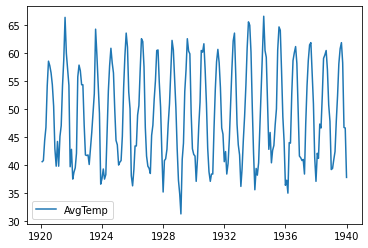

In [3]:
plt.plot(AirTemp.TimeIndex, AirTemp.AvgTemp,label='AvgTemp')
plt.legend(loc='best')
plt.show()

#### Plot the average forecast

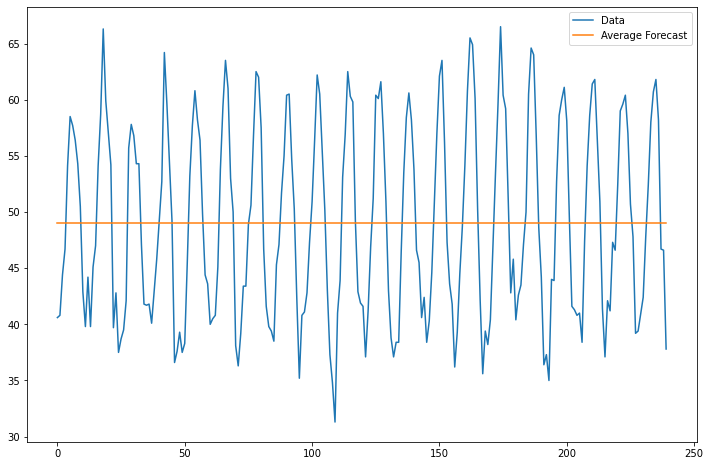

In [4]:
temp_avg                 = AirTemp.copy()
temp_avg['avg_forecast'] = AirTemp['AvgTemp'].mean()

plt.figure(figsize=(12,8))
plt.plot(AirTemp['AvgTemp'], label='Data')
plt.plot(temp_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

#### Plot the moving average forecast and average temperature

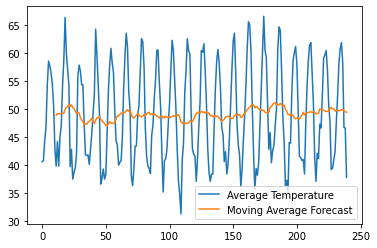

In [5]:
mvg_avg = AirTemp.copy()
mvg_avg['moving_avg_forecast'] = AirTemp['AvgTemp'].rolling(12).mean()
plt.plot(AirTemp['AvgTemp'], label='Average Temperature')
plt.plot(mvg_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

### Example 9
### Moving average of window size 5 for US GDP

In [6]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime
import  pandas                   as       pd


DatetimeIndex(['1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
      

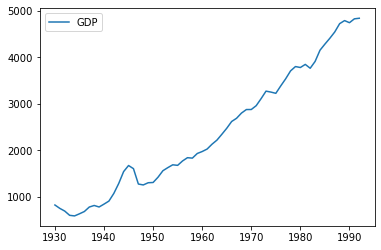

In [7]:
USGDP    = pd.read_csv('D:/GDPUS.csv', header=0)
date_rng = pd.date_range(start='1/1/1929', end='31/12/1991', freq='A')
print(date_rng)

USGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
plt.plot(USGDP.TimeIndex, USGDP.GDP,label='GDP')

plt.legend(loc='best')
plt.show()

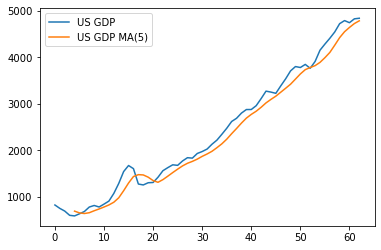

In [8]:
mvg_avg_USGDP = USGDP.copy()
mvg_avg_USGDP['moving_avg_forecast'] = USGDP['GDP'].rolling(5).mean()
plt.plot(USGDP['GDP'], label='US GDP')
plt.plot(mvg_avg_USGDP['moving_avg_forecast'], label='US GDP MA(5)')
plt.legend(loc='best')
plt.show()

Moving average line is close to the original data line.

### Example 10
### Moving average of window size 3 for India GDP

In [9]:
### Load required libraries

from    pandas                   import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot        as       plt
from    datetime                 import   datetime
import  pandas                   as       pd

   Year  GDPpercapita  TimeIndex
0  1960     81.284764 1960-12-31
1  1961     84.426437 1961-12-31
2  1962     88.914919 1962-12-31
3  1963    100.048592 1963-12-31
4  1964    114.315161 1964-12-31


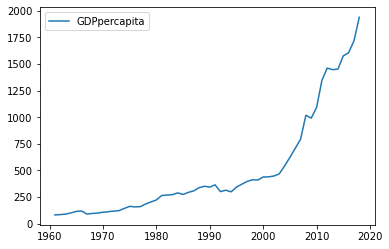

In [10]:
IndiaGDP              = pd.read_csv('D:/GDPIndia.csv', header=0)

date_rng              = pd.date_range(start='1/1/1960', end='31/12/2017', freq='A')
IndiaGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])

print(IndiaGDP.head())

plt.plot(IndiaGDP.TimeIndex, IndiaGDP.GDPpercapita,label='GDPpercapita')
plt.legend(loc='best')
plt.show()

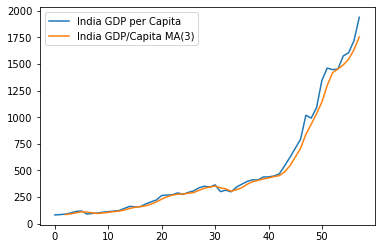

In [11]:
mvg_avg_IndiaGDP                        = IndiaGDP.copy()
mvg_avg_IndiaGDP['moving_avg_forecast'] = IndiaGDP['GDPpercapita'].rolling(3).mean()

plt.plot(IndiaGDP['GDPpercapita'], label='India GDP per Capita')
plt.plot(mvg_avg_IndiaGDP['moving_avg_forecast'], label='India GDP/Capita MA(3)')
plt.legend(loc='best')
plt.show()

Moving average line is close to the original data line.

# END